10


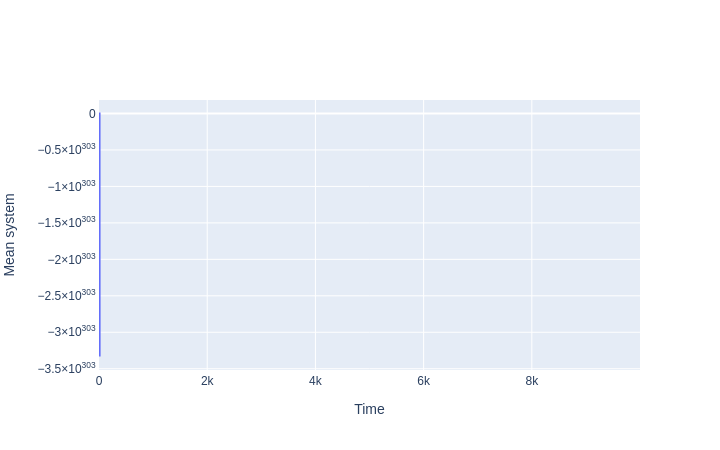

In [5]:
from plexsim.models import *
import sys; sys.path.insert(0, '../')
import networkx as nx, numpy as np
from plotly import express as px,  graph_objects as go

n =  5
g = nx.grid_graph([n, n], 1)
# g = nx.star_graph(5)
g = nx.random_geometric_graph(10, .3)
# g = nx.path_graph(3)

# nx.set_node_attributes(g, {node : 0. for node in g.nodes()}, 'state')
# idx = np.random.randint(0, len(g))
# node = list(g.nodes())[idx]
# g.nodes()[node]['state'] =1 

t = 1
settings = dict(\
               eta = .15,\
               mu  = .01,\
               beta =  1/t,\
               t    = t,\
               updateType = 'async', \
#                sampleSize = 1,\
#              H = np.ones(g.number_of_nodes()) * 1
               )
# m = Potts(g, **settings)
# m = Pottsis(g, **settings)
m = Logmap(g, r = .5,  agentStates = np.linspace(0, 1, 3), \
           **settings)

# m = SIRS(g, beta = .8, kappa = 0, mu = 0, \
#          nu = .07,\
#         agentStates = np.arange(2),\
#         )
print(m.nNodes)
# m.reset()
from Toolbox import infcy
sim = infcy.Simulator(m)

import time
def timeit(func, loops, args):
    start = time.time()
    for l in range(loops):
        func(**args)
    print(f"{time.time() - start}")
# # sim.snapshots(10, 100)
# a = 10
# N = 100
# b = dict(n_samples = .25
#         time_steps = 10)
# timeit(sim.running, a, b)

# b = dict(model = m, 
#         nSamples = N,\
#         window = 10)
# timeit(infcy.reverseMC, a, b)
# m.agentStates
# m.reset()
fig = go.Figure()
for i in range(1):
    m.reset()
    res = m.simulate(10000)
#     sicks = (res == 1).mean(1)
#     healthies = (res == 0).mean(1)
#     fig.add_trace(go.Scatter(y = sicks, marker = dict(color = 'blue')))
#     fig.add_trace(go.Scatter(y = healthies, marker = dict(color = 'red')))
    fig.add_trace(go.Scatter(y = res.mean(1)))
fig.update_layout(xaxis_title ='Time', yaxis_title = 'Mean system')
fig.show()


In [2]:
settings = dict(\
                n_samples = int(1e4),\
                time_steps   = 20,\
                repeats      = int(1e4),\
#                 steps        = 1,
)

N = 5
mis = np.zeros((N, settings['time_steps'], m.nNodes))
for i in range(N):
    m.reset()
#     tmp = sim.running(**settings, center = 1)
    tmp = sim.forward(**settings)
    conditional = tmp.get('conditional')
    snapshots   = tmp.get('snapshots')
    px_, mi      = infcy.mutualInformation(conditional, snapshots)
#     mis += mi
    mis[i] = mi
assert len(conditional) == len(snapshots)
print(mi.shape)


ValueError: Buffer dtype mismatch, expected 'state_t' but got 'double'

In [ ]:
# for k, v in conditional.items(): 
#     print(v[0,0])
#     print(snapshots.get(k))
# print(sum(snapshots.values()))
# from matplotlib.pyplot import subplots
# fig, ax = subplots()
# nx.draw(g, with_labels = 1)
# fig.show()

In [ ]:
fig = go.Figure()
# fig.add_trace(go.Heatmap(z = mi.T, \
#                          zmin = 0,\
#                          zmax = 1,\

#                         )
#                         )t
spacing  = 1
# mis = px[...,1][None,:]
# print(px.shape)
# mis = i[None
from scipy.stats import sem
colors = px.colors.qualitative.Bold
for idx, mi_n in enumerate(mis.mean(0).T):
    fig.add_trace(go.Scatter(y = mi_n[::spacing],\
#                          showlegend = False,\
                            error_y =  dict(array = sem(mis, 0)[..., idx]),\
                            fillcolor = colors[idx])
             )
fig.update_layout(xaxis_title = r"$\delta$", yaxis_title = r"mi $I(s_i^{t+\delta} ; S^t)$",\
                 title = f"{m.__class__.__name__}", \
#                   yaxis = dict(range = [0, 1]),\
                 )
fig.show()
print(mis)


In [ ]:
H = np.zeros(v.shape[:-1])
px = np.zeros(v.shape)
entropy = lambda x: -np.nansum(x * np.log(x), -1)
for k, v in conditional.items():
   H  -=  entropy(v) * snapshots.get(k)
   px += v * snapshots.get(k)
   print(snapshots.get(k))
H += entropy(px)
# print(entropy(px) - H)
print(H)


In [ ]:
# snapshots = sim.snapshots(100)

fig = go.Figure()
bar = go.Bar( y = list(snapshots.values()))
# bar2= go.Bar( y = list(a[:, 2, 0, 0]))
fig.add_traces([bar])
fig.show()
print(max(snapshots.values()))


fig = go.Figure()
for i in range(settings.get('time_steps')):
    bar = go.Bar(y = a[0, i, :, 0], showlegend = False)
    fig.add_trace(bar)
fig.show()

In [ ]:
# fig = go.Figure()
# pos = nx.kamada_kawai_layout(g)
# # for k, v in pos.items():
# #     fig.add_trace(go.Scatter(x = [v[0]], y = [v[1]]))
# for u, v in g.edges():
#     x = pos[u]
#     y = pos[v]
#     fig.add_trace(go.Line(x = [x[0], y[0]], y = [x[1], y[1]], \
#                          line = dict(color = 'black'),\
#                          showlegend = False,\
#                          marker = dict(color = 'red', size = 30)))
    
# fig.show()   
